In [1]:

from utility.types import AllocationMethodsEnum
from data.universe import Universe
from backtest.backtest import Backtester


In [10]:
universe_obj = Universe(index_universe="SPX Index",start_date="2019-01-01",end_date="2022-01-01")

In [11]:
bk_test = Backtester(
    universe_obj=universe_obj
)

Backtesting portfolio...:   3%|▎         | 26/783 [00:00<00:03, 251.10it/s]


-------  Returns statistical information  --------
Expected return annualized: 1.60 % vs 21.99 % (benchmark)
CAGR: -7.32 % vs 20.93 % (benchmark)
Expected volatility annualized: 41.53 % vs 22.16 % (benchmark)
Specific volatility (diversifiable) annualized: 31.67 %
Systematic volatility annualized: 26.87 %
Skewness: -0.42 vs -0.75 (benchmark), <0 = left tail, >0 = right tail
Kurtosis: 4.43 vs -0.75 (benchmark) , >3 = fat tails, <3 = thin tails
95%-VaR: -3.73 % vs -1.79 % (benchmark) -> the lower the better
95%-CVaR: -6.22 % vs -3.49 % (benchmark) -> the lower the better

-------  Strategy statistical information  -------
Max drawdown: -74.99 % vs -33.92 % (benchmark)
Kelly criterion: 0.34 % vs 11.04 % (benchmark)
Benchmark sensitivity (beta): 1.21 vs 1 (benchmark)
Determination coefficient R²: 0.42
Tracking error annualized: 32.01 %

---------------  Strategy ratios  ----------------
No risk free rate considered for the following ratios.

Sharpe ratio annualized: 0.04 vs 0.99 (benchmar

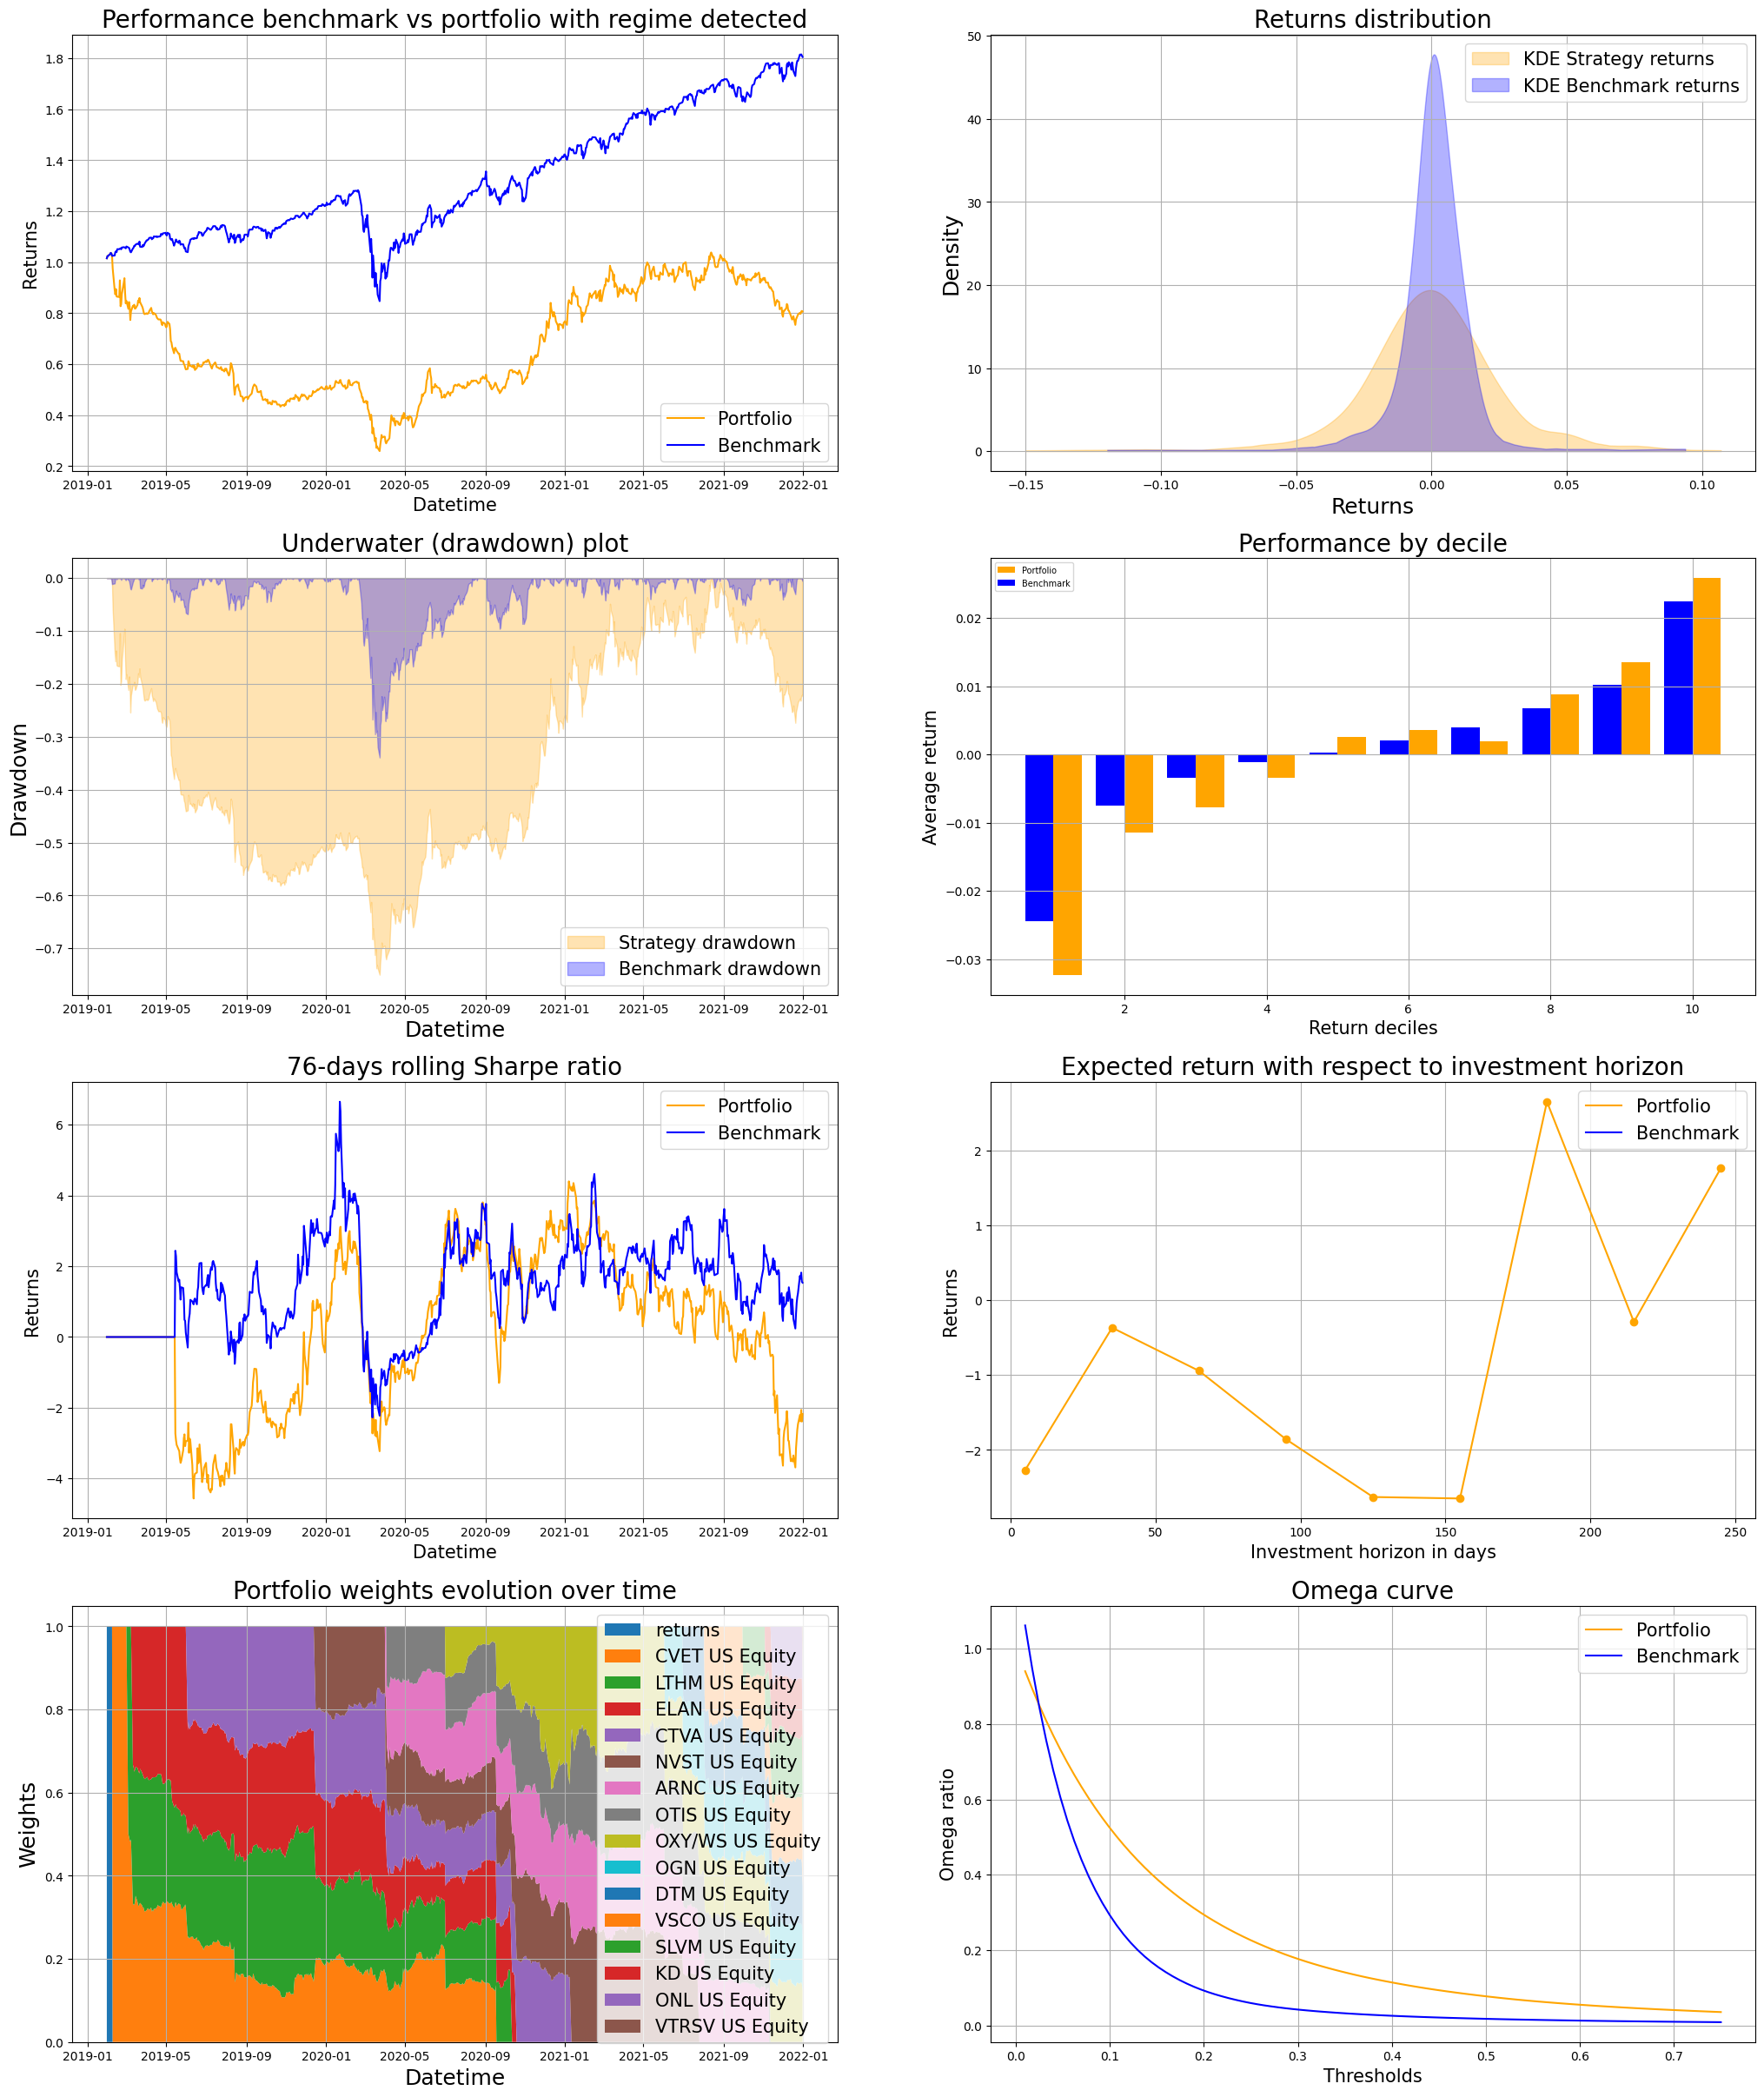

In [14]:


ptf_and_bench, ptf_weights_df, ptf_metrics_df = bk_test.run_backtest(
    allocation_type = AllocationMethodsEnum.EQUALLY_WEIGHTED,
    backtest_type="subsidiaries",
    holding_period_in_months=20,
    transaction_cost=0.001,  # 10 BP
    plot_performance=True,
    verbose=False,
)

# Parent behaviour

In [16]:
from utility.utils import wrangle_spin_off_dataframe
from backtest.analysis import get_spin_off_parent_behavior
import numpy as np

spin_off_announcement = wrangle_spin_off_dataframe(universe_obj.get_spin_off_history())
spin_off_announcement


{datetime.date(2021, 5, 11): [SpinOff(parent_company='BBWI UN Equity', subsidiary_company='VSCO US Equity', spin_off_ex_date=datetime.date(2021, 8, 3))],
 datetime.date(2015, 12, 11): [SpinOff(parent_company='DD UN Equity', subsidiary_company='CTVA US Equity', spin_off_ex_date=datetime.date(2019, 6, 3))],
 datetime.date(2019, 11, 15): [SpinOff(parent_company='DHR UN Equity', subsidiary_company='NVST US Equity', spin_off_ex_date=datetime.date(2019, 12, 16))],
 datetime.date(2020, 10, 27): [SpinOff(parent_company='DTE UN Equity', subsidiary_company='DTM US Equity', spin_off_ex_date=datetime.date(2021, 7, 1))],
 datetime.date(2019, 2, 4): [SpinOff(parent_company='ECL UN Equity', subsidiary_company='1695496D US Equity', spin_off_ex_date=datetime.date(2020, 6, 4))],
 datetime.date(2019, 2, 11): [SpinOff(parent_company='FMC UN Equity', subsidiary_company='LTHM US Equity', spin_off_ex_date=datetime.date(2019, 3, 4))],
 datetime.date(2019, 9, 4): [SpinOff(parent_company='FTV UN Equity', subsid

In [48]:
DAYS_BEFORE = 50
DAYS_AFTER = 50

behaviours = []

for spinoffs in spin_off_announcement.values():
    for spinoff in spinoffs:
        result = get_spin_off_parent_behavior(
                universe_obj.get_returns_history_from_spinoff(), spinoff, DAYS_BEFORE, DAYS_AFTER
            )
        if result.shape[0]!=0 and result.shape[0]==DAYS_AFTER+DAYS_BEFORE:
            behaviours.append(
                result
            )

behaviours = np.array(behaviours)
behaviours

array([[1.00543638, 1.03081112, 1.0487835 , ..., 1.20579477, 1.20465937,
        1.18308677],
       [0.98794542, 0.98627566, 0.97663121, ..., 0.90087669, 0.91365966,
        0.89145086],
       [0.98609318, 0.95743052, 0.96858481, ..., 1.19706631, 1.17040985,
        1.18224059],
       ...,
       [1.06528418, 1.06067588, 1.08678955, ..., 0.92703418, 0.83697943,
        0.83773619],
       [0.99604246, 0.98199817, 0.99389283, ..., 0.80433114, 0.77947372,
        0.71664604],
       [0.99844373, 0.99688842, 0.99533553, ..., 0.80464235, 0.81684001,
        0.8507112 ]])

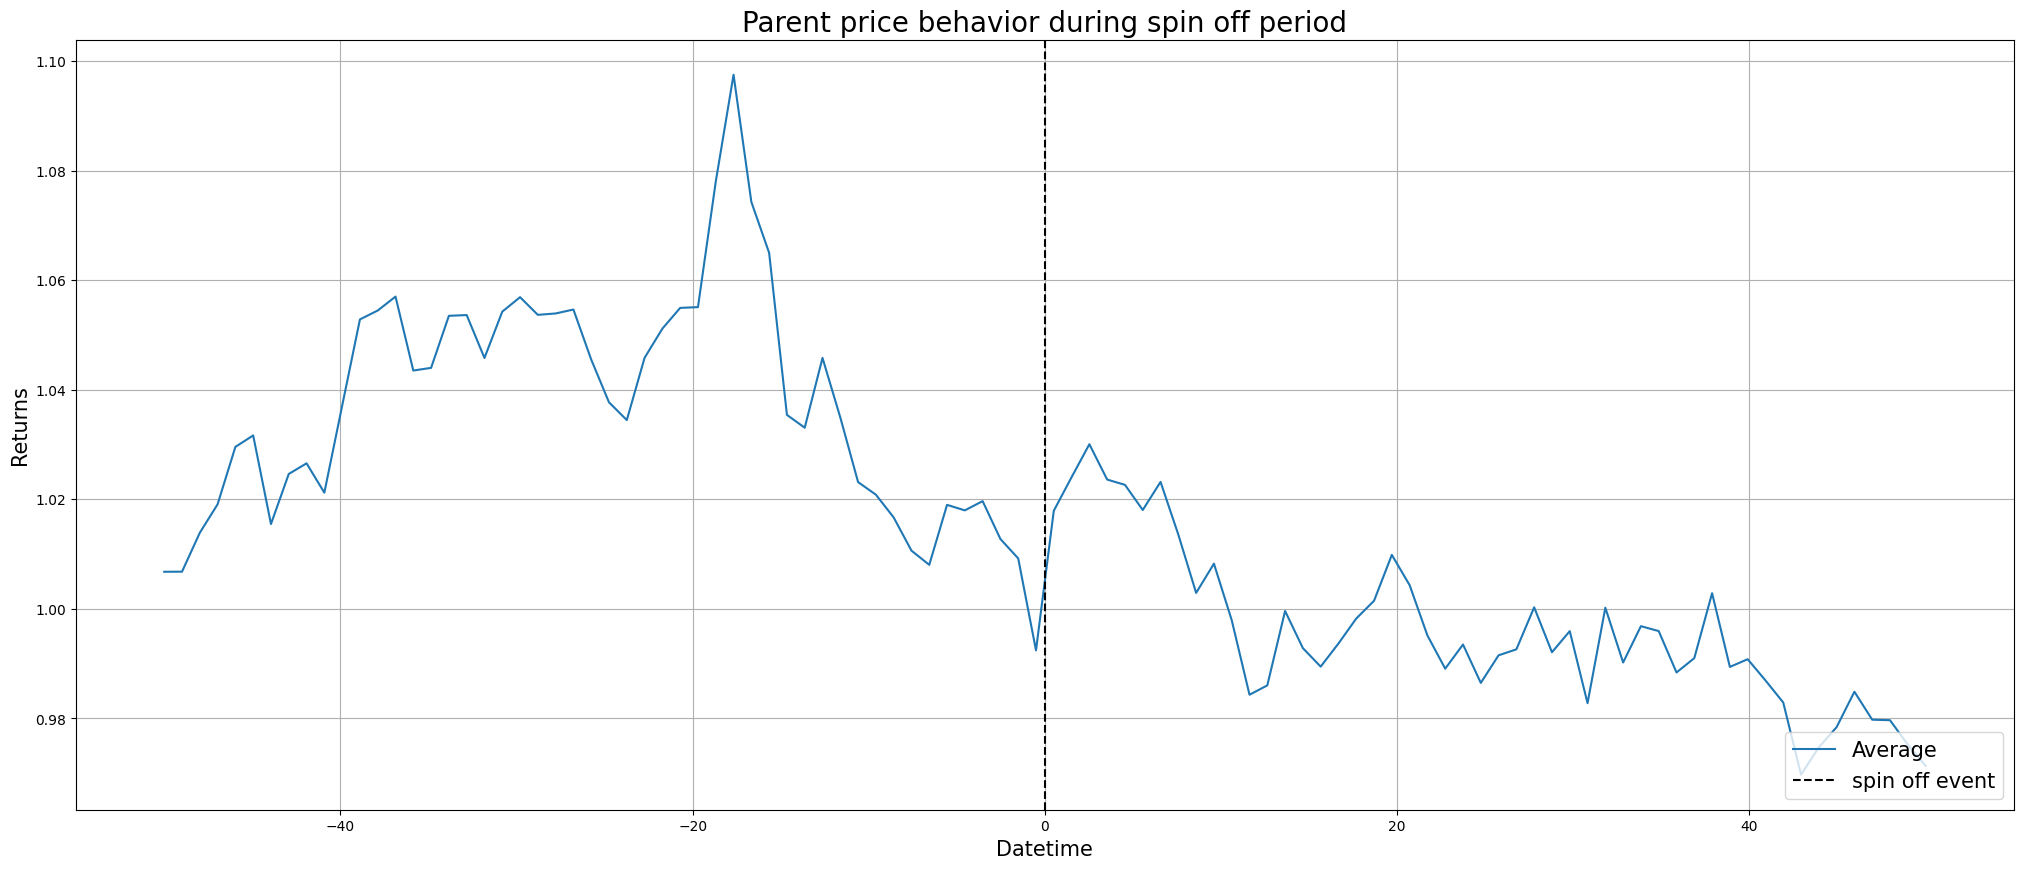

In [49]:
from matplotlib import pyplot as plt

_, ax = plt.subplots(1, 1, figsize=(25, 10))

ax.plot(
    np.linspace(-DAYS_BEFORE, DAYS_AFTER, num=DAYS_BEFORE + DAYS_AFTER),
    np.mean(behaviours, axis=0),
    label="Average",
)
ax.axvline(x=0, color="black", label="spin off event", linestyle="--")
ax.grid()
ax.set_xlabel("Datetime", fontsize=15)
ax.set_ylabel("Returns", fontsize=15)
ax.set_title(f"Parent price behavior during spin off period", fontsize=20)
ax.legend(loc="lower right", fontsize=15)